In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Dataset
df_elec = pd.read_csv('/content/electricity-prod-source-stacked.csv')
df_mat = pd.read_csv('/content/Synthetic fibres and emissions caused in yarn prep.csv')

In [3]:
df_elec.head(3)

,Entity,Code,Year,Electricity from coal (TWh),Electricity from gas (TWh),Electricity from hydro (TWh),Electricity from other renewables (TWh),Electricity from solar (TWh),Electricity from oil (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh)
0,Afghanistan,AFG,2000,0.0,0.155,0.312,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.094,0.498,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.132,0.555,0.0,0.0,0.0,0.0,0.0


In [4]:
df_mat.head(20)

,Material,Power Source,CO2e/mBTU,"C02e(1/MJ,kg))",Emissions/kg,Energy(MJ/Kg)
0,Nylon,Coal (anthracite),228.6,531689.9958,69119699.45,130
1,Nylon,Coal (bituminous),205.7,478427.9621,62195635.07,130
2,Nylon,Coal (lignite),215.4,500988.7362,65128535.71,130
3,Nylon,Coal (subbituminous),214.3,498430.2979,64795938.73,130
4,Nylon,Diesel fuel and heating oil,161.3,375160.0889,48770811.56,130
5,Nylon,Gasoline (without ethanol),157.2,365624.0916,47531131.91,130
6,Nylon,Propane,139.0,323293.5670,42028163.71,130
7,Nylon,Natural gas,117.0,272124.8010,35376224.13,130
8,Polyester,Coal (anthracite),228.6,531689.9958,66461249.48,125
9,Polyester,Coal (bituminous),205.7,478427.9621,59803495.26,125


In [5]:
# I created a for loop to assign values to a new list, so anywhere its see coal, gas and oil, it should append them to a new list called Pointer_syn.

pointer_syn = []
for i in range(len(df_mat['Power Source'])):
  if 'coal' in df_mat['Power Source'][i].lower():
    pointer_syn.append('coal')
  elif 'oil' in df_mat['Power Source'][i].lower():
    pointer_syn.append('oil')
  else:
    pointer_syn.append('gas')

In [6]:
#changing the key to 'Source'
df_mat['Source'] = pointer_syn

In [7]:
# Now we have a new column called 'source'
df_mat.head(10)

,Material,Power Source,CO2e/mBTU,"C02e(1/MJ,kg))",Emissions/kg,Energy(MJ/Kg),Source
0,Nylon,Coal (anthracite),228.6,531689.9958,69119699.45,130,coal
1,Nylon,Coal (bituminous),205.7,478427.9621,62195635.07,130,coal
2,Nylon,Coal (lignite),215.4,500988.7362,65128535.71,130,coal
3,Nylon,Coal (subbituminous),214.3,498430.2979,64795938.73,130,coal
4,Nylon,Diesel fuel and heating oil,161.3,375160.0889,48770811.56,130,oil
5,Nylon,Gasoline (without ethanol),157.2,365624.0916,47531131.91,130,gas
6,Nylon,Propane,139.0,323293.5670,42028163.71,130,gas
7,Nylon,Natural gas,117.0,272124.8010,35376224.13,130,gas
8,Polyester,Coal (anthracite),228.6,531689.9958,66461249.48,125,coal
9,Polyester,Coal (bituminous),205.7,478427.9621,59803495.26,125,coal


In [8]:
#Grouping dataset by material and source and getting the average 
df_mat = df_mat.groupby(['Material', 'Source'], as_index=False).mean()

In [9]:
df_mat

,Material,Source,CO2e/mBTU,"C02e(1/MJ,kg))",Emissions/kg,Energy(MJ/Kg)
0,Acrylic,coal,216.000000,502384.248000,8.791724e+07,175
1,Acrylic,gas,137.733333,320347.486533,5.606081e+07,175
2,Acrylic,oil,161.300000,375160.088900,6.565302e+07,175
3,Cotton,coal,216.000000,502384.248000,3.014305e+07,60
4,Cotton,gas,137.733333,320347.486533,1.922085e+07,60
5,Cotton,oil,161.300000,375160.088900,2.250961e+07,60
6,Linen,coal,216.000000,502384.248000,5.023842e+06,10
7,Linen,gas,137.733333,320347.486533,3.203475e+06,10
8,Linen,oil,161.300000,375160.088900,3.751601e+06,10
9,Nylon,coal,216.000000,502384.248000,6.530995e+07,130


In [10]:
df_mat.head(3)

,Material,Source,CO2e/mBTU,"C02e(1/MJ,kg))",Emissions/kg,Energy(MJ/Kg)
0,Acrylic,coal,216.000000,502384.248000,8.791724e+07,175
1,Acrylic,gas,137.733333,320347.486533,5.606081e+07,175
2,Acrylic,oil,161.300000,375160.088900,6.565302e+07,175


In [11]:
#Electricity dataset
df_elec.Entity.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia Pacific', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS', 'Cambodia', 'Cameroon', 'Canada',
       'Cayman Islands', 'Central African Republic', 'Central America',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'EU-27', 'EU27+1',
       'Eastern Africa', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'E

In [12]:
df_elec

,Entity,Code,Year,Electricity from coal (TWh),Electricity from gas (TWh),Electricity from hydro (TWh),Electricity from other renewables (TWh),Electricity from solar (TWh),Electricity from oil (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh)
0,Afghanistan,AFG,2000,0.000000,0.155,0.312,0.000000,0.000,0.0,0.0,0.0
1,Afghanistan,AFG,2001,0.000000,0.094,0.498,0.000000,0.000,0.0,0.0,0.0
2,Afghanistan,AFG,2002,0.000000,0.132,0.555,0.000000,0.000,0.0,0.0,0.0
3,Afghanistan,AFG,2003,0.000000,0.309,0.630,0.000000,0.000,0.0,0.0,0.0
4,Afghanistan,AFG,2004,0.000000,0.329,0.565,0.000000,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6236,Zimbabwe,ZWE,2015,4.311780,0.000,4.940,0.128000,0.008,0.0,0.0,0.0
6237,Zimbabwe,ZWE,2016,3.714880,0.000,2.955,0.147000,0.009,0.0,0.0,0.0
6238,Zimbabwe,ZWE,2017,3.218560,0.000,3.929,0.151000,0.011,0.0,0.0,0.0
6239,Zimbabwe,ZWE,2018,3.932020,0.000,5.000,0.187000,0.014,0.0,0.0,0.0


In [13]:
#unpivoting the dataset and melting the dataset in order to turn it from many columns to a few columns but many rows.
df_elec = df_elec.melt(id_vars=['Entity', 'Code', 'Year'],var_name= 'Energy Source', value_name='Energy (TWh)')

In [14]:
df_elec

,Entity,Code,Year,Energy Source,Energy (TWh)
0,Afghanistan,AFG,2000,Electricity from coal (TWh),0.0
1,Afghanistan,AFG,2001,Electricity from coal (TWh),0.0
2,Afghanistan,AFG,2002,Electricity from coal (TWh),0.0
3,Afghanistan,AFG,2003,Electricity from coal (TWh),0.0
4,Afghanistan,AFG,2004,Electricity from coal (TWh),0.0
...,...,...,...,...,...
49923,Zimbabwe,ZWE,2015,Electricity from nuclear (TWh),0.0
49924,Zimbabwe,ZWE,2016,Electricity from nuclear (TWh),0.0
49925,Zimbabwe,ZWE,2017,Electricity from nuclear (TWh),0.0
49926,Zimbabwe,ZWE,2018,Electricity from nuclear (TWh),0.0


In [15]:
#a for loop to assign values to a new list, so anywhere its see coal, gas and oil in the emergy source it should append them to a new list called Pointer_syn.
pointer_elec = []
for i in range(len(df_elec['Energy Source'])):
  if 'coal' in df_elec['Energy Source'][i].lower():
    pointer_elec.append('coal')
  elif 'oil' in df_elec['Energy Source'][i].lower():
    pointer_elec.append('oil')
  elif 'gas' in df_elec['Energy Source'][i].lower():
    pointer_elec.append('gas')
  else:
    pointer_elec.append('others')

In [16]:
df_elec['Source'] = pointer_elec

In [17]:
df_elec.head()

,Entity,Code,Year,Energy Source,Energy (TWh),Source
0,Afghanistan,AFG,2000,Electricity from coal (TWh),0.0,coal
1,Afghanistan,AFG,2001,Electricity from coal (TWh),0.0,coal
2,Afghanistan,AFG,2002,Electricity from coal (TWh),0.0,coal
3,Afghanistan,AFG,2003,Electricity from coal (TWh),0.0,coal
4,Afghanistan,AFG,2004,Electricity from coal (TWh),0.0,coal


In [18]:
#checking for missing values using code as the benchmark
df_elec[df_elec['Code'].isnull()]['Entity'].unique()

array(['Africa', 'Asia Pacific', 'CIS', 'Central America', 'EU-27',
       'EU27+1', 'Eastern Africa', 'Europe', 'Europe (other)',
       'Faroe Islands', 'Macau', 'Middle Africa', 'Middle East',
       'North America', 'Other Asia & Pacific', 'Other CIS',
       'Other Caribbean', 'Other Middle East', 'Other Northern Africa',
       'Other South America', 'Other Southern Africa',
       'South & Central America', 'U.S. Pacific Islands',
       'Western Africa'], dtype=object)

I used 'code' to differeintiate between the country and the continents, this is simply because continent has no code

In [19]:
#Using code as the benchmaek 
df_elec[df_elec['Code'].notnull()]['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'French Guiana', 'French Polynesia', 'Gabo

In [20]:
df_elec = df_elec[(df_elec['Code'].notnull()) & (df_elec['Entity']!='World')]

In [21]:
df_elec

,Entity,Code,Year,Energy Source,Energy (TWh),Source
0,Afghanistan,AFG,2000,Electricity from coal (TWh),0.0,coal
1,Afghanistan,AFG,2001,Electricity from coal (TWh),0.0,coal
2,Afghanistan,AFG,2002,Electricity from coal (TWh),0.0,coal
3,Afghanistan,AFG,2003,Electricity from coal (TWh),0.0,coal
4,Afghanistan,AFG,2004,Electricity from coal (TWh),0.0,coal
...,...,...,...,...,...,...
49923,Zimbabwe,ZWE,2015,Electricity from nuclear (TWh),0.0,others
49924,Zimbabwe,ZWE,2016,Electricity from nuclear (TWh),0.0,others
49925,Zimbabwe,ZWE,2017,Electricity from nuclear (TWh),0.0,others
49926,Zimbabwe,ZWE,2018,Electricity from nuclear (TWh),0.0,others


In [22]:
# To convert Terawatt Hours to Megajoules is 36 billion.
df_elec['Energy (MJ)'] = df_elec['Energy (TWh)']*3600000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
df_elec.tail(17)

,Entity,Code,Year,Energy Source,Energy (TWh),Source,Energy (MJ)
49911,Zimbabwe,ZWE,2003,Electricity from nuclear (TWh),0.0,others,0.0
49912,Zimbabwe,ZWE,2004,Electricity from nuclear (TWh),0.0,others,0.0
49913,Zimbabwe,ZWE,2005,Electricity from nuclear (TWh),0.0,others,0.0
49914,Zimbabwe,ZWE,2006,Electricity from nuclear (TWh),0.0,others,0.0
49915,Zimbabwe,ZWE,2007,Electricity from nuclear (TWh),0.0,others,0.0
49916,Zimbabwe,ZWE,2008,Electricity from nuclear (TWh),0.0,others,0.0
49917,Zimbabwe,ZWE,2009,Electricity from nuclear (TWh),0.0,others,0.0
49918,Zimbabwe,ZWE,2010,Electricity from nuclear (TWh),0.0,others,0.0
49919,Zimbabwe,ZWE,2011,Electricity from nuclear (TWh),0.0,others,0.0
49920,Zimbabwe,ZWE,2012,Electricity from nuclear (TWh),0.0,others,0.0


In [24]:
#merging both dataset on source which is common between both :coal, oil and gas
data = df_mat.merge(df_elec, on='Source')

In [25]:
data

,Material,Source,CO2e/mBTU,"C02e(1/MJ,kg))",Emissions/kg,Energy(MJ/Kg),Entity,Code,Year,Energy Source,Energy (TWh),Energy (MJ)
0,Acrylic,coal,216.0,502384.2480,8.791724e+07,175,Afghanistan,AFG,2000,Electricity from coal (TWh),0.0,0.0
1,Acrylic,coal,216.0,502384.2480,8.791724e+07,175,Afghanistan,AFG,2001,Electricity from coal (TWh),0.0,0.0
2,Acrylic,coal,216.0,502384.2480,8.791724e+07,175,Afghanistan,AFG,2002,Electricity from coal (TWh),0.0,0.0
3,Acrylic,coal,216.0,502384.2480,8.791724e+07,175,Afghanistan,AFG,2003,Electricity from coal (TWh),0.0,0.0
4,Acrylic,coal,216.0,502384.2480,8.791724e+07,175,Afghanistan,AFG,2004,Electricity from coal (TWh),0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
81565,Polyester,oil,161.3,375160.0889,4.689501e+07,125,Zimbabwe,ZWE,2015,Electricity from oil (TWh),0.0,0.0
81566,Polyester,oil,161.3,375160.0889,4.689501e+07,125,Zimbabwe,ZWE,2016,Electricity from oil (TWh),0.0,0.0
81567,Polyester,oil,161.3,375160.0889,4.689501e+07,125,Zimbabwe,ZWE,2017,Electricity from oil (TWh),0.0,0.0
81568,Polyester,oil,161.3,375160.0889,4.689501e+07,125,Zimbabwe,ZWE,2018,Electricity from oil (TWh),0.0,0.0


In [26]:
#data = df_mat.merge(df_elec, on='Source', how='outer')

In [27]:
#Finding the amount of material used in producing electricity 
data['Amount of Material (Kg)'] = data['Energy (MJ)']/data['Energy(MJ/Kg)']

In [28]:
data.head(50)

,Material,Source,CO2e/mBTU,"C02e(1/MJ,kg))",Emissions/kg,Energy(MJ/Kg),Entity,Code,Year,Energy Source,Energy (TWh),Energy (MJ),Amount of Material (Kg)
0,Acrylic,coal,216.0,502384.248,8.791724e+07,175,Afghanistan,AFG,2000,Electricity from coal (TWh),0.0,0.0,0.0
1,Acrylic,coal,216.0,502384.248,8.791724e+07,175,Afghanistan,AFG,2001,Electricity from coal (TWh),0.0,0.0,0.0
2,Acrylic,coal,216.0,502384.248,8.791724e+07,175,Afghanistan,AFG,2002,Electricity from coal (TWh),0.0,0.0,0.0
3,Acrylic,coal,216.0,502384.248,8.791724e+07,175,Afghanistan,AFG,2003,Electricity from coal (TWh),0.0,0.0,0.0
4,Acrylic,coal,216.0,502384.248,8.791724e+07,175,Afghanistan,AFG,2004,Electricity from coal (TWh),0.0,0.0,0.0
5,Acrylic,coal,216.0,502384.248,8.791724e+07,175,Afghanistan,AFG,2005,Electricity from coal (TWh),0.0,0.0,0.0
6,Acrylic,coal,216.0,502384.248,8.791724e+07,175,Afghanistan,AFG,2006,Electricity from coal (TWh),0.0,0.0,0.0
7,Acrylic,coal,216.0,502384.248,8.791724e+07,175,Afghanistan,AFG,2007,Electricity from coal (TWh),0.0,0.0,0.0
8,Acrylic,coal,216.0,502384.248,8.791724e+07,175,Afghanistan,AFG,2008,Electricity from coal (TWh),0.0,0.0,0.0
9,Acrylic,coal,216.0,502384.248,8.791724e+07,175,Afghanistan,AFG,2009,Electricity from coal (TWh),0.0,0.0,0.0


The first 50 is zero because the energy used in some of the sources is zero but we can also check the last 50 to see some figures.

In [29]:
data.tail(50)

,Material,Source,CO2e/mBTU,"C02e(1/MJ,kg))",Emissions/kg,Energy(MJ/Kg),Entity,Code,Year,Energy Source,Energy (TWh),Energy (MJ),Amount of Material (Kg)
81520,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2010,Electricity from oil (TWh),4.499384,1.619778e+10,1.295823e+08
81521,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2011,Electricity from oil (TWh),3.599507,1.295823e+10,1.036658e+08
81522,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2012,Electricity from oil (TWh),4.103694,1.477330e+10,1.181864e+08
81523,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2013,Electricity from oil (TWh),4.932207,1.775595e+10,1.420476e+08
81524,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2014,Electricity from oil (TWh),4.436143,1.597012e+10,1.277609e+08
81525,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2015,Electricity from oil (TWh),3.584422,1.290392e+10,1.032314e+08
81526,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2016,Electricity from oil (TWh),2.876589,1.035572e+10,8.284576e+07
81527,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2017,Electricity from oil (TWh),2.393870,8.617931e+09,6.894345e+07
81528,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2018,Electricity from oil (TWh),1.828183,6.581459e+09,5.265167e+07
81529,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2019,Electricity from oil (TWh),1.242770,4.473972e+09,3.579177e+07


This explains that 1.2 million kilogram of oil used in Yemen in the year 2010 generated 4.5 TWH of energy. From 2011, we can see how it kept fluctuating in this country.

In [30]:
# To calculate the emission of co2 on all materials
data['Emissions (CO2e)'] = data['Amount of Material (Kg)'] * data['Emissions/kg']

In [31]:
data.tail(50)

,Material,Source,CO2e/mBTU,"C02e(1/MJ,kg))",Emissions/kg,Energy(MJ/Kg),Entity,Code,Year,Energy Source,Energy (TWh),Energy (MJ),Amount of Material (Kg),Emissions (CO2e)
81520,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2010,Electricity from oil (TWh),4.499384,1.619778e+10,1.295823e+08,6.076762e+15
81521,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2011,Electricity from oil (TWh),3.599507,1.295823e+10,1.036658e+08,4.861409e+15
81522,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2012,Electricity from oil (TWh),4.103694,1.477330e+10,1.181864e+08,5.542352e+15
81523,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2013,Electricity from oil (TWh),4.932207,1.775595e+10,1.420476e+08,6.661322e+15
81524,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2014,Electricity from oil (TWh),4.436143,1.597012e+10,1.277609e+08,5.991350e+15
81525,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2015,Electricity from oil (TWh),3.584422,1.290392e+10,1.032314e+08,4.841036e+15
81526,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2016,Electricity from oil (TWh),2.876589,1.035572e+10,8.284576e+07,3.885053e+15
81527,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2017,Electricity from oil (TWh),2.393870,8.617931e+09,6.894345e+07,3.233104e+15
81528,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2018,Electricity from oil (TWh),1.828183,6.581459e+09,5.265167e+07,2.469101e+15
81529,Polyester,oil,161.3,375160.0889,46895011.11,125,Yemen,YEM,2019,Electricity from oil (TWh),1.242770,4.473972e+09,3.579177e+07,1.678456e+15


In [32]:
#data['Material'].fillna('Other Materials', inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81570 entries, 0 to 81569
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Material                 81570 non-null  object 
 1   Source                   81570 non-null  object 
 2   CO2e/mBTU                81570 non-null  float64
 3   C02e(1/MJ,kg))           81570 non-null  float64
 4   Emissions/kg             81570 non-null  float64
 5   Energy(MJ/Kg)            81570 non-null  int64  
 6   Entity                   81570 non-null  object 
 7   Code                     81570 non-null  object 
 8   Year                     81570 non-null  int64  
 9   Energy Source            81570 non-null  object 
 10  Energy (TWh)             70470 non-null  float64
 11  Energy (MJ)              70470 non-null  float64
 12  Amount of Material (Kg)  70470 non-null  float64
 13  Emissions (CO2e)         70470 non-null  float64
dtypes: float64(7), int64(2

We have some missing values so I am going to fill them with NaN

In [34]:
data.fillna(0, inplace=True)

In [35]:
#grouping the final data by Material amd Entity and finding the average kg of Co2 per kg material.
df_final = data.groupby(['Material', 'Entity'], as_index=False).mean()[['Material', 'Entity','C02e(1/MJ,kg))', 'Emissions (CO2e)']]

In [36]:
df_final

,Material,Entity,"C02e(1/MJ,kg))",Emissions (CO2e)
0,Acrylic,Afghanistan,399297.274478,7.411559e+13
1,Acrylic,Albania,399297.274478,2.109555e+13
2,Acrylic,Algeria,399297.274478,1.000137e+16
3,Acrylic,American Samoa,399297.274478,7.560976e+13
4,Acrylic,Angola,399297.274478,7.578864e+14
...,...,...,...,...
1045,Polyester,Vietnam,399297.274478,2.100351e+16
1046,Polyester,Western Sahara,399297.274478,1.935826e+13
1047,Polyester,Yemen,399297.274478,2.184937e+15
1048,Polyester,Zambia,399297.274478,2.403775e+14


In [37]:
# sorting the values by emissions
df_final = df_final.sort_values(by='Emissions (CO2e)')

In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 316 to 1039
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Material          1050 non-null   object 
 1   Entity            1050 non-null   object 
 2   C02e(1/MJ,kg))    1050 non-null   float64
 3   Emissions (CO2e)  1050 non-null   float64
dtypes: float64(2), object(2)
memory usage: 41.0+ KB


In [39]:
df_final.head()

,Material,Entity,"C02e(1/MJ,kg))",Emissions (CO2e)
316,Cotton,Lesotho,399297.274478,0.0
946,Polyester,Lesotho,399297.274478,0.0
106,Acrylic,Lesotho,399297.274478,0.0
635,Nylon,Antarctica,399297.274478,0.0
769,Nylon,North Macedonia,399297.274478,0.0


In [40]:
#Renaming entity to country and  Co2e(1/MJ,kg) to Average kg Co2e per kg material.
df_final.rename({'Entity':'Country of Origin'}, axis=1, inplace=True)
df_final.rename({'C02e(1/MJ,kg))': 'Average kg Co2e per kg material'}, axis = 1, inplace = True)

In [41]:
df_final

,Material,Country of Origin,Average kg Co2e per kg material,Emissions (CO2e)
316,Cotton,Lesotho,399297.274478,0.000000e+00
946,Polyester,Lesotho,399297.274478,0.000000e+00
106,Acrylic,Lesotho,399297.274478,0.000000e+00
635,Nylon,Antarctica,399297.274478,0.000000e+00
769,Nylon,North Macedonia,399297.274478,0.000000e+00
...,...,...,...,...
619,Linen,United States,399297.274478,1.368550e+18
829,Nylon,United States,399297.274478,1.368550e+18
409,Cotton,United States,399297.274478,1.368550e+18
199,Acrylic,United States,399297.274478,1.368550e+18


In [42]:
df_final.to_csv('df_final.csv', index = False)

Ploting Emissions from the Top 10 Countries

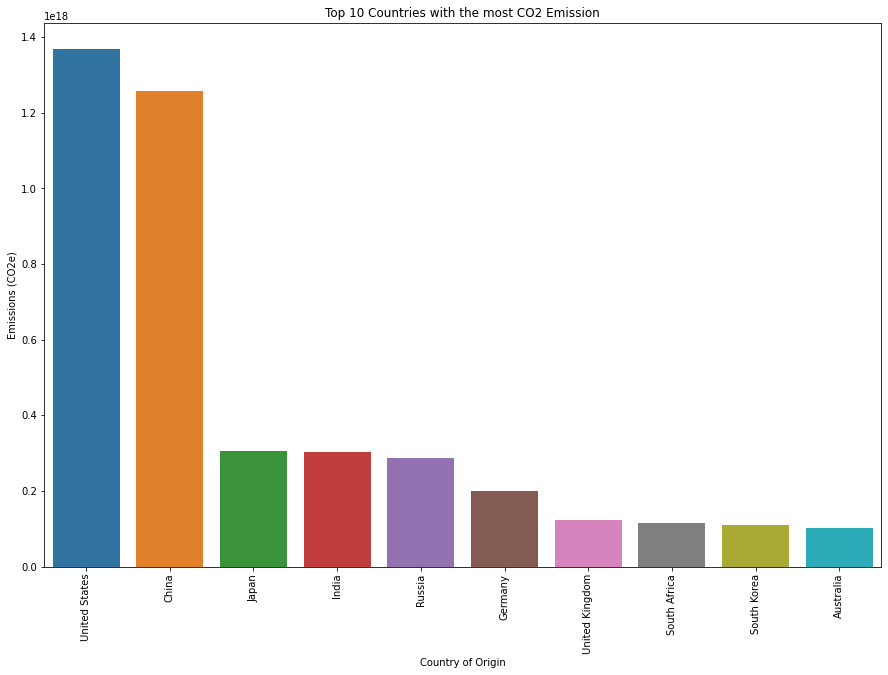

In [43]:
fig = plt.figure(figsize=(15,10))
viz = df_final.groupby('Country of Origin', as_index=False).mean().sort_values(by='Emissions (CO2e)', ascending=False).head(10)
ax = sns.barplot(x='Country of Origin', y='Emissions (CO2e)', data=viz)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(title='Top 10 Countries with the most CO2 Emission')
plt.show()
fig.savefig('Top10CountriesEmission.png')

In [44]:
from google.colab import files

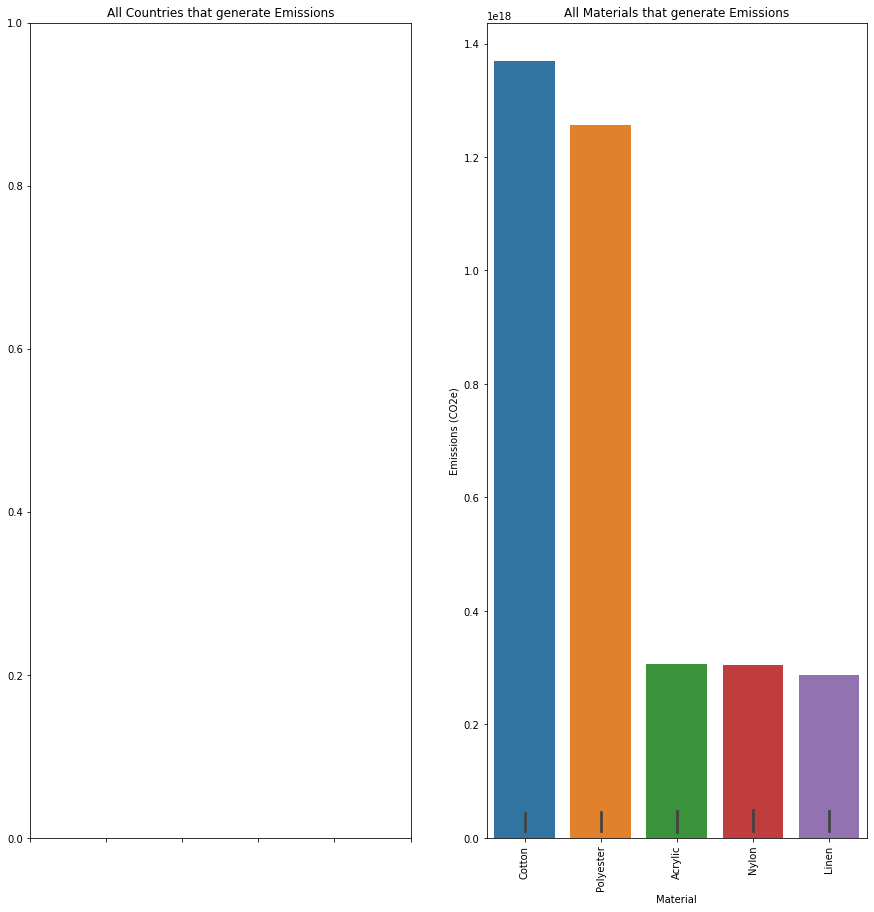

In [45]:
f,(ax1, ax2) = plt.subplots(1, 2, figsize= (15,15))
viz = df_final.groupby('Country of Origin', as_index=False).mean().sort_values(by='Emissions (CO2e)', ascending=False).head(10)
#viz2 = df_final.groupby('Material', as_index=False).mean().sort_values(by='Emissions (CO2e)', ascending=False).head(10)
sns.barplot(x = 'Country of Origin', y = 'Emissions (CO2e)', data = viz)
sns.barplot(x = 'Material', y = 'Emissions (CO2e)', ax= ax2, data = df_final)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
ax1.set(title='All Countries that generate Emissions')
ax2.set(title='All Materials that generate Emissions')
plt.show()
fig.savefig('AllMaterialsthatgenerateEmissions.png')
#files.download('AllMaterialsthatgenerateEmissions.pdf')

In [46]:
Top_10 = ["United States","China","Japan","India","Russia","Germany","United Kingdom","South Africa","South Korea","Australia"]

In [47]:
df_top_10_countries = df_final.loc[df_final['Country of Origin'].isin(Top_10)]

In [48]:
df_top_10_countries

,Material,Country of Origin,Average kg Co2e per kg material,Emissions (CO2e)
430,Linen,Australia,399297.274478,1.009832e+17
640,Nylon,Australia,399297.274478,1.009832e+17
220,Cotton,Australia,399297.274478,1.009832e+17
10,Acrylic,Australia,399297.274478,1.009832e+17
850,Polyester,Australia,399297.274478,1.009832e+17
385,Cotton,South Korea,399297.274478,1.097174e+17
595,Linen,South Korea,399297.274478,1.097174e+17
805,Nylon,South Korea,399297.274478,1.097174e+17
175,Acrylic,South Korea,399297.274478,1.097174e+17
1015,Polyester,South Korea,399297.274478,1.097174e+17


In [49]:
import pandas as pd
import sqlite3
import warnings
warnings.filterwarnings('ignore')


"""
Things you should edit

1.  check if the names of the columns (eg.  Material, Country_of_Origin, Average_kg_C02e, Emissions). also make sure they match the df_final.csv
2. Make sure '/content/df_final.csv' is the dataset that has these columns (Material, Country_of_Origin, Average_kg_C02e, Emissions).
    else check any of the other dataset(/content/electricity-prod-source-stacked.csv'],['/content/df_final.csv'], ['/content/df_final.csv')
3. "df_final" is the name of the table. so if you are creating the other tables use a nother table name. 
4. the commented code is just an example of how the other table will be converted to sql. 

"""

conn = sqlite3.connect('test_database_2') 
c = conn.cursor()

#Create table with approraite data types 
c.execute("""CREATE TABLE IF NOT EXISTS df_final (Material VARCHAR(9) NOT NULL PRIMARY KEY,
                                                          Country_of_Origin VARCHAR(22),
                                                          Average_per_material VARCHAR(17) NOT NULL,
                                                          Emissions VARCHAR(17) NOT NULL
                                                          )""")

c.execute("""CREATE TABLE IF NOT EXISTS synthetic_fibre (Material     VARCHAR(9) NOT NULL PRIMARY KEY
                                                  ,Power_Source VARCHAR(27) NOT NULL
                                                  ,CO2emBTU     NUMERIC(5,1) NOT NULL
                                                  ,C02e1MJkg    NUMERIC(11,4) NOT NULL
                                                  ,Emissionskg  NUMERIC(11,3) NOT NULL
                                                  ,EnergyMJKg   INTEGER  NOT NULL
                                                          )""")

c.execute("""CREATE TABLE IF NOT EXISTS electricity_emission (Entity  VARCHAR(32) NOT NULL PRIMARY KEY
                                                ,Code    VARCHAR(8)
                                                ,Year    INTEGER  NOT NULL
                                                ,Electricity_from_coal_TWh             VARCHAR(20)
                                                ,Electricity_from_gas_TWh              VARCHAR(20)
                                                ,Electricity_from_hydro_TWh            VARCHAR(20) NOT NULL
                                                ,Electricity_from_other_renewables_TWh VARCHAR(21)
                                                ,Electricity_from_solar_TWh            VARCHAR(23) NOT NULL
                                                ,Electricity_from_oil_TWh              VARCHAR(21)
                                                ,Electricity_from_wind_TWh             VARCHAR(22) NOT NULL
                                                ,Electricity_from_nuclear_TWh          VARCHAR(19) NOT NULL
                                                          )""")


conn.commit()

#read csv 
df_final = pd.read_csv('/content/df_final.csv')
synthetic_fibres = pd.read_csv('/content/Synthetic fibres and emissions caused in yarn prep.csv')
electricity =  pd.read_csv('/content/electricity-prod-source-stacked.csv')



#Convert from pandas dataframe to sql , passing values to appropriate tables
df_final.to_sql('df_final', conn, if_exists='replace', index = False)
synthetic_fibres.to_sql('synthetic_fibre', conn, if_exists='replace', index = False)
electricity.to_sql('electricity_emission', conn, if_exists='replace', index = False)

#Query df_final_table
c.execute('''  
		SELECT * FROM df_final
          ''')

df = pd.DataFrame(c.fetchall(), columns=['Material','Country_of_Origin','Average_per_material','Emissions'])    

#Uncomment this section to query synthetic fibre table
# c.execute('''  
# 		SELECT * FROM synthetic_fibre
#           ''')

# df = pd.DataFrame(c.fetchall(), columns=['Material','Power_Source','CO2emBTU','C02e1MJkg','Emissionskg','EnergyMJKg'])

#Uncomment this section to query electricity_emission table
# c.execute('''  
# 		SELECT *
#     FROM electricity_emission
#           ''')

# df = pd.DataFrame(c.fetchall(), columns=['Entity','Code','Year',
#                                          'Electricity_from_coal_TWh ','Electricity_from_gas_TWh',
#                                          'Electricity_from_hydro_TWh',
#                                          'Electricity_from_other_renewables_TWh',
#                                          'Electricity_from_solar_TWh',
#                                          'Electricity_from_oil_TWh',
#                                          'Electricity_from_wind_TWh',
#                                          'Electricity_from_nuclear_TWh'])

print (df)

       Material Country_of_Origin  Average_per_material     Emissions
0        Cotton           Lesotho         399297.274478  0.000000e+00
1     Polyester           Lesotho         399297.274478  0.000000e+00
2       Acrylic           Lesotho         399297.274478  0.000000e+00
3         Nylon        Antarctica         399297.274478  0.000000e+00
4         Nylon   North Macedonia         399297.274478  0.000000e+00
...         ...               ...                   ...           ...
1045      Linen     United States         399297.274478  1.368550e+18
1046      Nylon     United States         399297.274478  1.368550e+18
1047     Cotton     United States         399297.274478  1.368550e+18
1048    Acrylic     United States         399297.274478  1.368550e+18
1049  Polyester     United States         399297.274478  1.368550e+18

[1050 rows x 4 columns]
